<a href="https://colab.research.google.com/github/paulo-rego/Sebrae-ESCs/blob/main/Atualiza%C3%A7%C3%A3o_de_ESCs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Script para atualização da relação de ESCs  
Este programa funciona como um auxílio para a atualização da relação de ESCs. Ele utiliza os PDFs de consultas gerados pelo Redesim para informar ao usuário quais as empresas que ainda não constam na relação fornecida e quais precisam ser removidas, seja por migração ou baixa.

##Passo 1 - Executando o código
Para começar a atualização basta apertar Ctrl+F9 ou clicar em "Ambiente de execução" na barra superior e escolher a opção "Executar tudo" 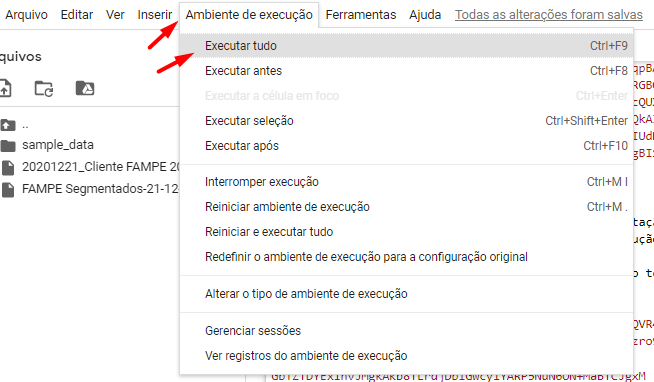

Durante a execução do script é completamente normal que a tela exiba informações como essas: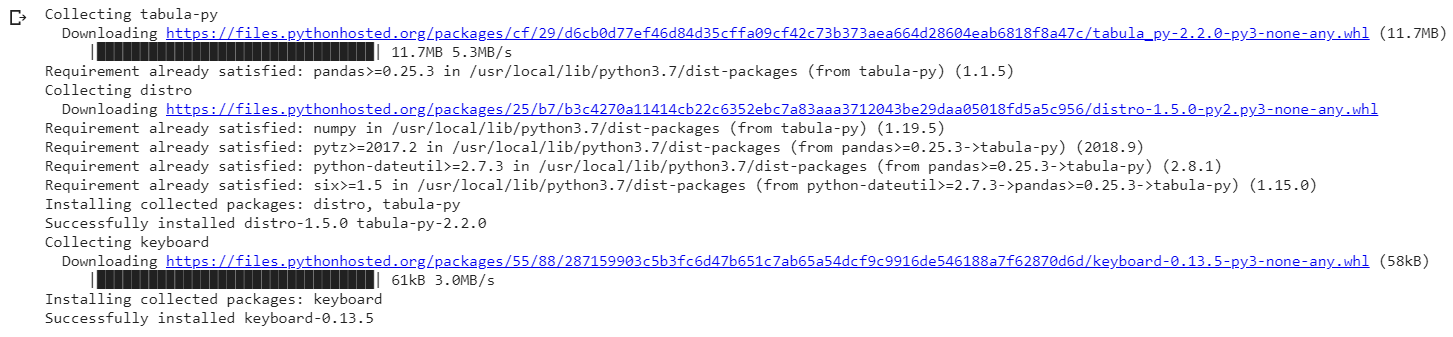
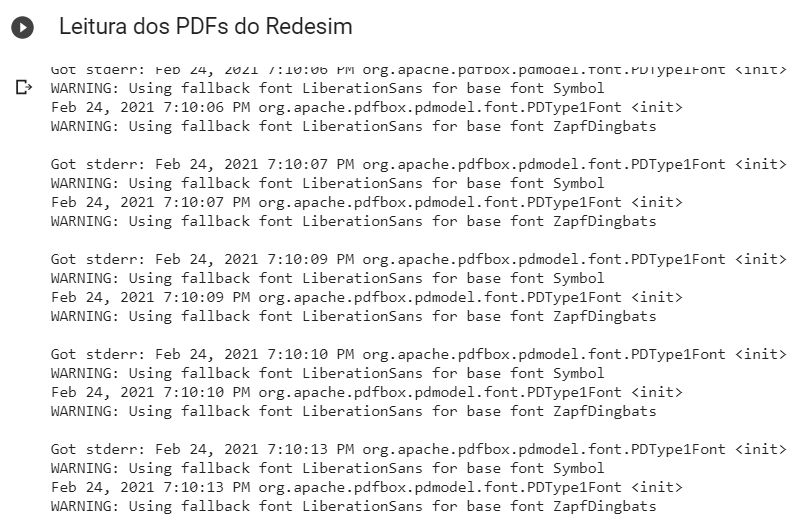Essas mensagens significam apenas que o programa está baixando os arquivos necessários para fazer a leitura dos PDFs ou que está tentando ler os PDFs

## Passo 2 - Fazer upload da relação de ESCs  
Depois de alguns segundos o programa vai parar sua execução e pedir para que o usuário faça upload da relação de ESCs. Para isso basta clicar em "Escolher arquivos" e escolher o arquivo Excel com a relação de ESCs mais recente.
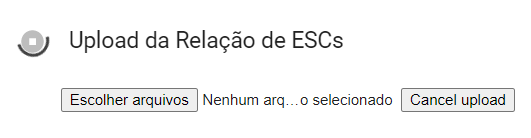
## Passo 3 - Upload dos PDFs de consultas da Redesim  
Após alguns segundos o programa vai parar sua execução novamente e pedir para que o usuário faça o upload dos arquivos de consultas. Basta clicar novamente no botão "Escolher arquivos" e escolher todos os arquivos baixados da Redesim.  
### Atenção - o programa espera que os arquivos estejam com os nomes "consulta***.pdf". Para o correto funcionamento, não modifique o nome dos arquivos que foram baixados da Redesim  
## Passo 4 - Final
O programa fará o restante do trabalho sozinho. Após o fim da execução do código o arquivo vai ser salvo no armazentamento da máquina virtual como "atualização-ESCs-{data de hoje}.xlsx". Caso você esteja usando o Google Chrome, o arquivo vai ser baixado automaticamente. Caso isso não aconteça ou você esteja usando outro navegador, basta abrir a pasta com os arquivos da máquina virtual clicando no ícone de pasta localizado à esquerda, localizar o arquivo, clicar nos 3 pontinhos ao lado do arquivo e selecionar a opção de "Fazer download"  
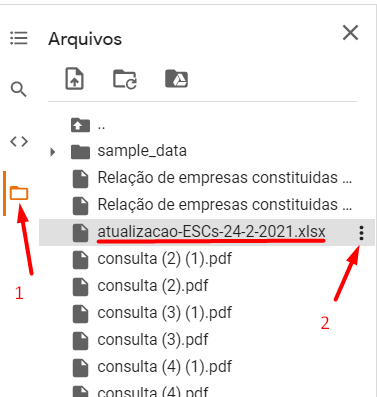
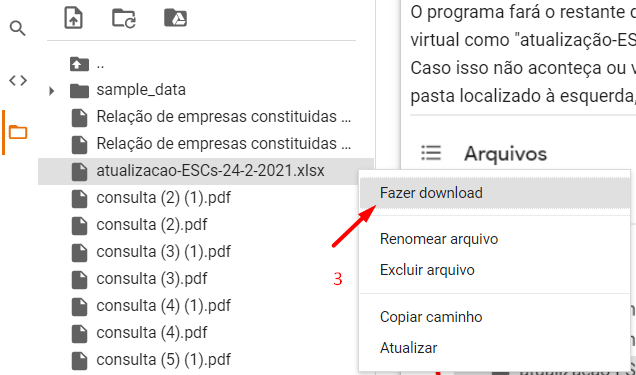

In [ ]:
#@title Instalação do Tabula-py - engine que faz a leitura dos PDFs
!pip install tabula-py

In [ ]:
#@title Importação de bibliotecas
#Importa as bibliotecas relevantes
import tabula
import pandas as pd
import pathlib
import os
import datetime
import warnings
from google.colab import files
import glob

warnings.filterwarnings('ignore')


In [ ]:
#@title Upload da Relação de ESCs
relacao_up = files.upload()

Saving Relação de empresas constituidas v2.xlsx to Relação de empresas constituidas v2 (1).xlsx


In [ ]:
#@title Upload dos arquivos de consultas Redesim
consultas_up = files.upload()

Saving consulta (8).pdf to consulta (8) (1).pdf
Saving consulta (7).pdf to consulta (7) (1).pdf
Saving consulta (6).pdf to consulta (6) (1).pdf
Saving consulta (5).pdf to consulta (5) (1).pdf
Saving consulta (4).pdf to consulta (4) (1).pdf
Saving consulta (3).pdf to consulta (3) (1).pdf
Saving consulta (2).pdf to consulta (2) (1).pdf
Saving consulta (1).pdf to consulta (1) (1).pdf


In [ ]:
#@title Leitura da Relação de Empresas
#Lê a relação de empresas constituídas do Excel ou de um arquivo CSV

if os.path.exists("/content/relacao.csv"):
  relacao = pd.read_csv("/content/relacao.csv", sep = ";", skiprows= 1, encoding = "utf8")
else:
  relacao = pd.read_excel("/content/Relação de empresas constituidas v2.xlsx", sheet_name=5, skiprows = 1)

In [ ]:
#@title Leitura dos PDFs do Redesim
#Lê todos os arquivos em um diretório
currentDirectory = pathlib.Path('consultas')

#Cria o dataframe que vai armazenar a lista de empresas lidas do PDF
dados = pd.DataFrame()

#Faz a leitura sequencial de todos os arquivos na pasta consultas e adiciona tudo a um dataframe
for currentFile in glob.glob("*consulta*"):
  tables = tabula.read_pdf(currentFile, pages = "all", area = (168.0,35.27,795.276,557.629), multiple_tables = True, pandas_options={"header": None, "columns" : ["nome","cnpj","status","uf"]})
  for i in range(len(tables)):
    dados = dados.append(tables[i])

dados = dados.dropna(thresh=3)

Got stderr: Feb 24, 2021 7:09:59 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Feb 24, 2021 7:09:59 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: Feb 24, 2021 7:10:01 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Feb 24, 2021 7:10:01 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: Feb 24, 2021 7:10:02 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Feb 24, 2021 7:10:02 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: Feb 24, 2021 7:10:03 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Feb 24, 2021 7:10:04 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: Feb 24, 2021 7:10:06 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Feb 24, 2021 7:10:06 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: Feb 24, 2021 7:10:07 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Feb 24, 2021 7:10:07 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: Feb 24, 2021 7:10:09 P

In [ ]:
#@title Tratamento dos dados
#Filtra apenas os estados para os quais foram emitidos os PDFs
relacao = relacao[relacao.UF.isin(dados.uf)]

# Verifica quais empresas já estão na relação e quais não estão
dados["antiga"] = dados.cnpj.isin(relacao.CNPJ)
novas = dados.query("antiga == False")

#filtra
relacao["manter"] = relacao.CNPJ.isin(dados.cnpj)

remover = relacao.query("manter == False")

In [ ]:
#@title Salva os resultados em Excel
dia = datetime.datetime.now()

with pd.ExcelWriter(f"atualizacao-ESCs-{dia.day}-{dia.month}-{dia.year}.xlsx",mode = "w") as writer:
  novas.to_excel(writer, sheet_name = "novas empresas", index = False)
  remover.to_excel(writer, sheet_name = "remover", index = False)

files.download(f"atualizacao-ESCs-{dia.day}-{dia.month}-{dia.year}.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>